In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import pyltr

In [3]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set_full.csv")
train.head()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_saturday_night_bool,srch_query_affinity_score,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score
0,0,1,12,187,3.45,152.24,219,893,3,3.5,...,1,-326.5675,NaN,0.45,0.162292,1.633987,2.614379,0.00,4,0
1,1,1,12,187,3.45,152.24,219,10404,4,4.0,...,1,-326.5675,NaN,0.55,0.049807,1.543739,2.572899,0.00,4,0
2,2,1,12,187,3.45,152.24,219,21315,3,4.5,...,1,-326.5675,NaN,0.45,0.072261,0.362976,0.907441,0.00,4,0
3,3,1,12,187,3.45,152.24,219,27348,2,4.0,...,1,-326.5675,NaN,1.45,0.597623,1.304348,2.391304,-0.75,4,0
4,4,1,12,187,3.45,152.24,219,29604,4,3.5,...,1,-326.5675,NaN,0.55,0.025435,3.609023,5.112782,0.00,4,0


In [4]:
train= train.drop(["Unnamed: 0"],axis=1)
train.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,srch_saturday_night_bool,srch_query_affinity_score,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score
0,1,12,187,3.45,152.24,219,893,3,3.5,1,...,1,-326.5675,NaN,0.45,0.162292,1.633987,2.614379,0.00,4,0
1,1,12,187,3.45,152.24,219,10404,4,4.0,1,...,1,-326.5675,NaN,0.55,0.049807,1.543739,2.572899,0.00,4,0
2,1,12,187,3.45,152.24,219,21315,3,4.5,1,...,1,-326.5675,NaN,0.45,0.072261,0.362976,0.907441,0.00,4,0
3,1,12,187,3.45,152.24,219,27348,2,4.0,1,...,1,-326.5675,NaN,1.45,0.597623,1.304348,2.391304,-0.75,4,0
4,1,12,187,3.45,152.24,219,29604,4,3.5,1,...,1,-326.5675,NaN,0.55,0.025435,3.609023,5.112782,0.00,4,0


### Modify the dataset for RandomForest regression and other standard ML algorithm

In [81]:
#Adding Score columns: 5 for booked, 1 clicked and 0 the rest
def assign_score(x):
    if x["booking_bool"]==1:
        val=10
    elif x["click_bool"]==1:
        val=1
    else:
        val=0
    return val
    

train['score'] = train.apply(assign_score , axis=1)


In [82]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,random_bool,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score
0,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,7011,2,2.0,...,1,0,NaN,0,6.0,1.1,0.000000,1.075269,0.000000,0
1,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,8797,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.680272,1.000000,0
2,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,14530,3,5.0,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
3,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,15770,2,2.5,...,1,0,NaN,0,6.0,1.1,0.000000,0.000000,0.000000,0
4,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,20295,3,4.0,...,1,0,NaN,0,6.0,1.1,3.488372,5.813953,0.750000,0
5,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,22013,3,3.5,...,1,0,NaN,0,6.0,1.1,1.657459,4.972376,0.000000,0
6,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,25236,4,3.0,...,1,0,NaN,0,6.0,1.1,4.145078,7.772021,0.000000,0
7,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,27142,4,4.0,...,1,0,NaN,0,6.0,1.1,2.325581,6.201550,0.000000,0
8,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31166,2,3.0,...,1,0,NaN,0,6.0,1.1,0.847458,0.847458,0.000000,0
9,43,2013-01-09 16:45:45,5,219,NaN,NaN,219,31486,4,4.0,...,1,0,NaN,0,6.0,1.1,1.507538,6.030151,0.250000,0


In [83]:
#add month columns and drop some useless columns
train["date_time"] = pd.to_datetime(train["date_time"])
train["month"] = train["date_time"].dt.month
column_id=train["srch_id"]
train = train.drop(["srch_id", "date_time"], axis=1)

In [85]:
#columns with Nan
train.columns[train.isna().any()].tolist()

['visitor_hist_starrating', 'visitor_hist_adr_usd', 'gross_bookings_usd']

In [86]:
#fill Nan
train=train.drop("gross_bookings_usd",axis=1)
values = {'visitor_hist_starrating': 0, 'visitor_hist_adr_usd': 0}
train=train.fillna(value=values)

In [87]:
np.all(np.isfinite(train))

False

In [88]:
#there are some infinite values in usd_diff
train= train.replace([np.inf, -np.inf], np.nan)
train.columns[train.isna().any()].tolist()
train=train.fillna(value={"usd_diff":0})

In [140]:
train.head()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,random_bool,click_bool,booking_bool,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,score,month
0,5,219,0.0,0.0,219,7011,2,2.0,1,2.94,...,1,0,0,6.0,1.1,0.000000,1.075269,0.00,0,1
1,5,219,0.0,0.0,219,8797,2,2.5,1,2.71,...,1,0,0,6.0,1.1,0.000000,0.680272,1.00,0,1
2,5,219,0.0,0.0,219,14530,3,5.0,1,1.61,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
3,5,219,0.0,0.0,219,15770,2,2.5,1,2.89,...,1,0,0,6.0,1.1,0.000000,0.000000,0.00,0,1
4,5,219,0.0,0.0,219,20295,3,4.0,1,3.47,...,1,0,0,6.0,1.1,3.488372,5.813953,0.75,0,1


In [90]:
np.all(np.isfinite(train))

True

### separate labels

In [70]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/New_train_set_full.csv")
train.head()


,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_saturday_night_bool,srch_query_affinity_score,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score
0,0,1,12,187,3.45,152.24,219,893,3,3.5,...,1,-326.5675,NaN,0.45,0.162292,1.633987,2.614379,0.00,4,0
1,1,1,12,187,3.45,152.24,219,10404,4,4.0,...,1,-326.5675,NaN,0.55,0.049807,1.543739,2.572899,0.00,4,0
2,2,1,12,187,3.45,152.24,219,21315,3,4.5,...,1,-326.5675,NaN,0.45,0.072261,0.362976,0.907441,0.00,4,0
3,3,1,12,187,3.45,152.24,219,27348,2,4.0,...,1,-326.5675,NaN,1.45,0.597623,1.304348,2.391304,-0.75,4,0
4,4,1,12,187,3.45,152.24,219,29604,4,3.5,...,1,-326.5675,NaN,0.55,0.025435,3.609023,5.112782,0.00,4,0


In [71]:
train.columns

Index(['Unnamed: 0', 'srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'gross_bookings_usd', 'starrating_diff', 'usd_diff',
       'booked_percentage', 'clicked_percentage', 'avg_comp_rate', 'month',
       'score'],
      dtype='object')

In [72]:
column_id=train["srch_id"]
train=train.drop(["srch_id","Unnamed: 0", "gross_bookings_usd","position", "prop_id"], axis=1)

In [73]:
y=train["score"]
X=train.drop("score", axis=1)

In [74]:
X.columns[X.isna().any()].tolist()

[]

In [75]:
np.all(np.isfinite(X))

True

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13 )

In [51]:
regr = RandomForestRegressor(random_state=0, n_estimators=30, n_jobs=-1)
rfr = regr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(r2_score(prediction, y_test))


-4.301765588676408


In [39]:
X_test

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month
1294995,32,220,3.45,152.24,14,3,0.0,0,3.61,0.1620,...,0,1,0,-35.7757,0.45,0.248890,1.204819,2.409639,-1.000000,1
1214337,5,219,3.45,152.24,219,4,4.0,1,3.58,0.0236,...,0,1,0,-326.5675,0.55,0.093933,3.117506,5.275779,0.666667,12
1284108,5,219,3.45,152.24,219,3,4.0,1,0.00,0.0000,...,0,1,1,-326.5675,0.45,0.290434,0.000000,0.000000,0.000000,1
4898310,5,219,3.45,152.24,219,3,4.0,1,1.61,0.0312,...,0,1,1,-326.5675,0.45,0.390137,4.000000,4.571429,-1.000000,11
742088,11,103,3.45,152.24,40,4,4.5,1,2.08,0.0228,...,1,1,0,-326.5675,0.55,0.158846,6.896552,6.896552,0.000000,6
2161858,5,219,3.45,152.24,123,4,4.0,0,1.95,0.0058,...,0,1,0,-23.7811,0.55,0.307468,0.000000,0.000000,0.000000,2
2432895,5,219,3.45,152.24,219,2,3.0,0,3.30,0.0004,...,0,1,0,-326.5675,1.45,0.411677,0.980392,3.431373,0.000000,4
2941093,5,219,3.45,152.24,219,2,3.5,1,2.30,0.0032,...,0,1,0,-326.5675,1.45,0.539076,0.398406,1.195219,0.000000,4
2588011,5,219,3.45,152.24,219,3,3.5,0,1.10,0.0590,...,0,2,1,-326.5675,0.45,0.411677,22.222222,33.333333,0.000000,5
4584645,5,219,3.45,152.24,219,2,3.5,1,1.95,0.0295,...,0,1,1,-326.5675,1.45,0.483559,1.030928,1.030928,0.000000,11


In [43]:
prediction_s = pd.Series(prediction)


### ElasticNet

In [69]:
regr = ElasticNet(random_state=0, alpha=0.00001,l1_ratio=0.2)
trained_model_en=regr.fit(X_train, y_train)
y_pred_enet = trained_model_en.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("r^2 on test data : %f" % r2_score_enet)

r^2 on test data : 0.056376


In [45]:
column_id=new_test_set["srch_id"]
new_test_set_ready=new_test_set.drop("srch_id", axis=1)
new_test_set_ready=new_test_set_ready.drop("prop_id", axis=1)
new_test_set_ready.shape

(4959183, 27)

In [47]:
new_test_set_ready.columns

Index(['site_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'starrating_diff', 'usd_diff',
       'booked_perc', 'clicked_perc', 'avg_comp_rate', 'month'],
      dtype='object')

In [56]:
#X_train.shape
real_test_prediction= trained_model_en.predict(new_test_set_ready)


In [58]:
real_test_prediction

(4959183,)

In [19]:
alphas = np.logspace(-5, 1, 60)
enet = ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 5.1506780761681216e-05


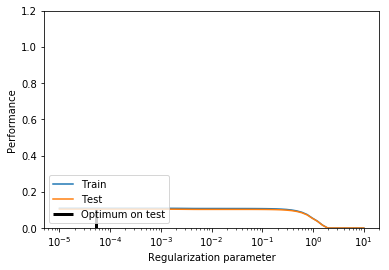

In [22]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

In [ ]:
#import real test set


### lambdaMART

In [2]:
from sklearn.datasets import dump_svmlight_file
from random import randint

In [76]:
#RUND THIS LINE only to save a new file in svm_light format
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining"+"/Full_train_forLM.txt")


In [94]:
#tran_LM=pd.read_table("C://Users//david\Desktop//VU amsterdam//Data mining/train_forLM.txt")

In [2]:
#function to read the svm_light file and split it in TRAIN and TEST
def get_data(file_loc):
    f_train= open("C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Full_train_lm_split.txt","w+")
    f_test= open("C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Full_validation_lm_split.txt","w+")
    f = open(file_loc, 'r')
    test_flag=False
    i=1
    previous_id=0
    for line in f:
        arr = line.split()
        ''' Get the score and query id '''
        score = arr[0]
        q_id = arr[1].split(':')[1]
        #print(q_id)
        if previous_id==0:
            f_train.write(line)
        elif previous_id == q_id:
            if test_flag:
                f_test.write(line)
            else:
                f_train.write(line)
        else:
            if i%5 == 0:
                test_flag=True
                f_test.write(line)
            else:
                test_flag=False
                f_train.write(line)
            i+=1
        previous_id=q_id

    f.close()
    f_train.close()
    f_test.close()

In [4]:
get_data("C://Users//david\Desktop//VU amsterdam//Data mining/other_datasets_trying//Preprocessed_train_set.txt")


In [3]:
# TO RUN LambdaMART run this code (and the libraries above)
import pyltr
#train_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining//train_lm.txt")
#test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/test_lm.txt")
full_train=open("C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Full_train_lm_split.txt")
full_valid=open("C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Full_validation_lm_split.txt")
#TX, Ty, Tqids, _ = pyltr.data.letor.read_dataset(train_lm)
Train_features, Train_scores, Train_qids, _ = pyltr.data.letor.read_dataset(full_train)
#Test_features, Test_scores, Test_qids, _ = pyltr.data.letor.read_dataset(test_lm)
Val_features, Val_scores, Val_qids, _ = pyltr.data.letor.read_dataset(full_valid)

In [4]:
Train_features.shape
#Val_features.shape

(3966558, 27)

In [6]:
metric = pyltr.metrics.NDCG(k=5)

monitor = pyltr.models.monitors.ValidationMonitor(Val_features, Val_scores, Val_qids, metric=metric, stop_after=10)

model = pyltr.models.LambdaMART(
    metric=metric,
    n_estimators=200,
    max_features=0.5,
    query_subsample=0.5,
    max_leaf_nodes=15,
    min_samples_leaf=64,
    verbose=1,
)

In [ ]:
#TRAIN
model.fit(Train_features, Train_scores, Train_qids, monitor=monitor)

 Iter  Train score  OOB Improve    Remaining                           Monitor Output 
    1       0.3431       0.2960      396.76m      C:      0.3405 B:      0.3405 S:  0
    2       0.3804       0.0373      401.23m      C:      0.3794 B:      0.3794 S:  0
    3       0.4021       0.0210      405.39m      C:      0.4010 B:      0.4010 S:  0
    4       0.4205       0.0188      412.54m      C:      0.4194 B:      0.4194 S:  0
    5       0.4263       0.0073      414.57m      C:      0.4271 B:      0.4271 S:  0
    6       0.4297       0.0026      412.51m      C:      0.4301 B:      0.4301 S:  0
    7       0.4344       0.0039      407.47m      C:      0.4332 B:      0.4332 S:  0
    8       0.4378       0.0027      416.66m      C:      0.4370 B:      0.4370 S:  0
    9       0.4412       0.0041      413.50m      C:      0.4412 B:      0.4412 S:  0
   10       0.4444       0.0037      409.70m      C:      0.4446 B:      0.4446 S:  0


In [23]:
Epred = model.predict(Test_features)
print ('Random ranking:', metric.calc_mean_random(Test_qids, Test_scores))
print ('Our model:', metric.calc_mean(Test_qids, Test_scores, Epred))

Random ranking: 0.22850953539318647
Our model: 0.5680370869528044


In [24]:
Epred

array([-0.1484142 ,  1.14482062, -0.52588722, ..., -0.02895467,
       -0.83267956,  1.47147386])

#### Extracting data from train (percentage book/click) and store it

In [8]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
train = pd.read_csv(path+"/training_set_VU_DM.csv")
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [40]:
hotel_quality = pd.DataFrame(train.prop_id.value_counts(dropna = False))
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.booking_bool == 1].value_counts().astype(int)), rsuffix = "book")
hotel_quality = hotel_quality.join(pd.DataFrame(train.prop_id[train.click_bool == 1].value_counts().astype(int)), rsuffix = "click")
hotel_quality.columns = ["counts", "booked", "clicked"]
hotel_quality["booked_percentage"] = hotel_quality.booked / hotel_quality.counts * 100
hotel_quality["clicked_percentage"] = hotel_quality.clicked / hotel_quality.counts * 100

In [41]:
hotel_quality = hotel_quality.fillna(value = {"booked_percentage": 0, "clicked_percentage": 0})


In [43]:
hotel_quality=hotel_quality.drop(["counts", "booked", "clicked"], axis=1)

In [46]:
hotel_quality.to_csv(path+"/hotel_quality.csv")

In [ ]:
hotel_quality.max()

### test on the test dataset to insert hotels_train quality

In [15]:
#load test set
test = pd.read_csv(path+"/test_set_VU_DM.csv")
test.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
hotels_train = pd.read_csv(path+"//hotel_quality.csv")
hotels_train.columns=["prop_id", "booked_perc", "clicked_perc"]

In [57]:
new_data_test = test.join(hotels_train.set_index("prop_id"),how="left", on="prop_id")

### How many hotels are in test but not in train? -> 121665 out of 129438

In [34]:
hotel_quality_test.index

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
             88165,   2915,  99234, 122755,  41332,   6221,  15205,  29038,
             24940,  82669],
           dtype='int64', length=129438)

In [33]:
hotel_quality_test.index.intersection(hotel_quality.index)

Int64Index([104517, 124342,  68420, 134154,  59781,  40279, 137997,  60846,
            116942,  49656,
            ...
            133923,  76615,  93007,  62348,  77677,  88165,  99234,  41332,
             29038,  24940],
           dtype='int64', length=121665)

### Test on real test set

In [ ]:
['site_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'starrating_diff', 'usd_diff',
       'booked_perc', 'clicked_perc', 'avg_comp_rate', 'month'],

In [12]:
new_test_set.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'starrating_diff', 'usd_diff', 'booked_perc', 'clicked_perc',
       'avg_comp_rate', 'month'],
      dtype='object')

In [3]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
new_test_set = pd.read_csv(path+"/New_test_set.csv")
new_test_set.head()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,random_bool,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,0,1,24,216,3.43,151.39,219,3180,3,4.5,...,1,0,-326.5675,0,0.43,0.104550,4.301075,4.301075,0.0,2
1,1,1,24,216,3.43,151.39,219,5543,3,4.5,...,1,0,-326.5675,0,0.43,0.108215,5.327869,6.147541,0.0,2
2,2,1,24,216,3.43,151.39,219,14142,2,3.5,...,1,0,-326.5675,0,1.43,0.489901,1.342282,2.684564,0.5,2
3,3,1,24,216,3.43,151.39,219,22393,3,4.5,...,1,0,-326.5675,0,0.43,0.024761,1.379310,1.379310,0.0,2
4,4,1,24,216,3.43,151.39,219,24194,3,4.5,...,1,0,-326.5675,0,0.43,0.282470,1.463415,1.951220,0.0,2


In [7]:
#new_test_set = new_test_set.fillna(value = {"booked_perc": 2.89, "clicked_perc": 5.01})
new_test_set = new_test_set.drop("Unnamed: 0", axis=1)
new_test_set = new_test_set.drop("random_bool", axis=1)
new_test_set.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,1,24,216,3.43,151.39,219,3180,3,4.5,1,...,0,1,0,-326.5675,0.43,0.104550,4.301075,4.301075,0.0,2
1,1,24,216,3.43,151.39,219,5543,3,4.5,1,...,0,1,0,-326.5675,0.43,0.108215,5.327869,6.147541,0.0,2
2,1,24,216,3.43,151.39,219,14142,2,3.5,1,...,0,1,0,-326.5675,1.43,0.489901,1.342282,2.684564,0.5,2
3,1,24,216,3.43,151.39,219,22393,3,4.5,1,...,0,1,0,-326.5675,0.43,0.024761,1.379310,1.379310,0.0,2
4,1,24,216,3.43,151.39,219,24194,3,4.5,1,...,0,1,0,-326.5675,0.43,0.282470,1.463415,1.951220,0.0,2


In [8]:
new_test_set.columns[new_test_set.isna().any()].tolist()

[]

In [9]:
column_id=new_test_set["srch_id"]
X=new_test_set.drop(["srch_id", "prop_id"], axis=1)
X.head()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,starrating_diff,usd_diff,booked_perc,clicked_perc,avg_comp_rate,month
0,24,216,3.43,151.39,219,3,4.5,1,2.94,0.0691,...,0,1,0,-326.5675,0.43,0.104550,4.301075,4.301075,0.0,2
1,24,216,3.43,151.39,219,3,4.5,1,2.64,0.0843,...,0,1,0,-326.5675,0.43,0.108215,5.327869,6.147541,0.0,2
2,24,216,3.43,151.39,219,2,3.5,1,2.71,0.0556,...,0,1,0,-326.5675,1.43,0.489901,1.342282,2.684564,0.5,2
3,24,216,3.43,151.39,219,3,4.5,1,2.40,0.0561,...,0,1,0,-326.5675,0.43,0.024761,1.379310,1.379310,0.0,2
4,24,216,3.43,151.39,219,3,4.5,1,2.94,0.2090,...,0,1,0,-326.5675,0.43,0.282470,1.463415,1.951220,0.0,2


In [15]:
X.shape

(4959183, 27)

In [18]:
y = [np.random.randint(0, 5) for p in range(0, 4959183)]
#X.columns

In [20]:
len(y)

4959183

In [32]:
#np.all(np.isfinite(X))
#X= X.replace([np.inf, -np.inf], np.nan)
#X = X.fillna(value = {"month": 1,"avg_comp_rate": 0}) 
#X.columns[X.isna().any()].tolist()


[]

In [19]:
#X= X.replace(-np.Inf, np.nan)
np.all(np.isfinite(X))

True

In [22]:
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining//Preprocessed_test_set.txt")

In [12]:
real_test_lm=open("C://Users//david\Desktop//VU amsterdam//Data mining/Preprocessed_test_set.txt")
Test_features_r, Test_scores_r, Test_qids_r, _ = pyltr.data.letor.read_dataset(real_test_lm)
real_test_lm.close()


In [13]:
len(Test_features_r)

4959183

In [16]:
len(Test_qids_r)

4959183

In [17]:
len(new_test_set["srch_id"])

4959183

In [26]:
# PREDICT REAL DEAL
Epred_r = model.predict(Test_features_r)

In [29]:
len(Epred_r)

4959183

In [4]:
np.savetxt("data/Predictions.txt", Epred_r, fmt='%f')

NameError: name 'Epred_r' is not defined

In [14]:
Epred_r= np.loadtxt("predictions_new_scoring.txt" )

In [15]:
len(Epred_r)

4959183

In [16]:
predictions_df=pd.DataFrame(Epred_r)
#submiss_test_set= predictions_df
submiss_test_set=pd.DataFrame(new_test_set["srch_id"])
submiss_test_set.columns=["srch_id"]
submiss_test_set["ranking"] = predictions_df
submiss_test_set["prop_id"]=new_test_set["prop_id"]
submiss_test_set.head()

,srch_id,ranking,prop_id
0,1,1.772570,3180
1,1,3.013933,5543
2,1,0.745050,14142
3,1,0.839368,22393
4,1,0.874140,24194


In [ ]:
#submission_results=submission_results.drop("ranking", axis=1)


In [ ]:
#submission_results.to_csv(path+"/submission_test_set.csv")

In [17]:
test_set_submission_result=submiss_test_set.groupby(["srch_id"]).apply(lambda x: x.sort_values(["ranking"], ascending=False)).reset_index(drop=True)
test_set_submission_result=test_set_submission_result.drop("ranking", axis=1)
test_set_submission_result.to_csv("RESULT_to_submit_new_scoring.csv",  index=False)

In [18]:
test_set_submission_result.head()

,srch_id,prop_id
0,1,5543
1,1,28181
2,1,99484
3,1,54937
4,1,3180


### TEST changing the score for the trainign set

In [6]:
#run the first cells
train.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'gross_bookings_usd', 'starrating_diff', 'usd_diff',
       'booked_percentage', 'clicked_percentage', 'avg_comp_rate', 'month',
       'score'],
      dtype='object')

In [7]:
def assign_score(x):
    pos= x["position"]
    if pos==1:
        val=5
    elif pos ==2:
        val=4
    elif pos >= 3 and pos <= 5:
        val=3
    elif pos >=6 and pos <=10:
        val=2
    else:
        val=1
    return val
    

train['score_position'] = train.apply(assign_score , axis=1)

In [12]:
train["new_score"]=train.apply(lambda row: (row["score"]+row["score_position"]), axis=1)

In [16]:
train.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,gross_bookings_usd,starrating_diff,usd_diff,booked_percentage,clicked_percentage,avg_comp_rate,month,score,score_position,new_score
0,1,12,187,3.45,152.24,219,893,3,3.5,1,...,NaN,0.45,0.162292,1.633987,2.614379,0.00,4,0,1,1.0
1,1,12,187,3.45,152.24,219,10404,4,4.0,1,...,NaN,0.55,0.049807,1.543739,2.572899,0.00,4,0,1,1.0
2,1,12,187,3.45,152.24,219,21315,3,4.5,1,...,NaN,0.45,0.072261,0.362976,0.907441,0.00,4,0,1,1.0
3,1,12,187,3.45,152.24,219,27348,2,4.0,1,...,NaN,1.45,0.597623,1.304348,2.391304,-0.75,4,0,1,1.0
4,1,12,187,3.45,152.24,219,29604,4,3.5,1,...,NaN,0.55,0.025435,3.609023,5.112782,0.00,4,0,3,3.0


In [17]:
y=train["new_score"]
column_id=train["srch_id"]
X=train.drop(["score","position","score_position","srch_id"] , axis=1)
X.shape

(4958347, 30)

In [20]:
X=X.drop(["new_score","prop_id","gross_bookings_usd"], axis=1)
X.shape

(4958347, 27)

In [21]:
dump_svmlight_file(X,y,query_id=column_id,zero_based=False, f="C://Users//david\Desktop//VU amsterdam//Data mining//other_datasets_trying//Preprocessed_train_set.txt")